# Appendix D — Pandas tutorial

The tutorial is still under development. See [this link](https://nobsstats.com/tutorials/pandas_tutorial.html) for the latest version, or click the binder button [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/minireference/noBSstats/HEAD?labpath=tutorials/pandas_tutorial.ipynb) to run this notebook interactively.


<!-- 
TOPICS CUT FROM SEC 1.2 (cover in Pandas tutorial appendix)
	- other aggregations 
		crosstab
		(optional) pivot table

    - astype \emph{transform} (data type)
	(optional) - .str text processing
	(optional) one-hot coding

    - Index and sorting
		- Sorting
		- \texttt{sort_values}
		- \texttt{sort_index}
		- rank
	
DECISIONS:
- Sept 12: no more use of the custom function `head`

-->

## Pandas overview

The Pandas library provides data structures for working with tabular data.
Pandas is the standard tool used for real-world data management,
data cleaning, and statistical analysis in Python.
You can think of Pandas as a Swiss army knife for data manipulations,
since it provides a multitude of functions and methods for doing common tasks.

<!-- is a powerful and versatile toolbox for manipulating tabular data. -->

This tutorial will introduce you to the essential parts of the Pandas library,
with a focus on the data manipulation tasks used in statistics.
We'll starting with Pandas essentials like loading data from source
into Pandas data frames, and get to know the data frame methods.

<!-- PYTHON PREREQUISITE -->
<!-- Pandas is a library built on top of basic Python syntax: -->
<!-- Maybe add a refresher on Python: list, sum, len, indexing, slicing, ??? -->
Pandas is a Python library,
so any prior experience with Python will come in handy.
Remember that Appendix C - [python_tutorial.ipynb](./python_tutorial.ipynb) contains a Python tutorial
you can use to get up to speed quickly on the syntax,
so if you haven't checked that out yet now would be a good time.
<!--
before we really start getting into the Pandas code examples.
This intro-to-python appendix will show you Python data types (`int`, `float`, `bool`, `list`, etc.),
Python operators (`+`, `-`, `*`, `/`, `**`, etc.),
and functions (`len`, `sum`, `print`, etc.).
There is nothing complicated,
but it's good to learn the basic syntax
so you'll know the meaning of symbols like `=`, `:`, `[`, `(`, etc.
-->

### Installing Pandas

First,
let's make sure pandas is installed using the `%pip` Jupyter command.

In [1]:
%pip install -q pandas

Note: you may need to restart the kernel to use updated packages.


We then import the `pandas` library under the alias `pd`,
which is a widespread convention that makes Pandas commands short and fast to type.

In [2]:
import pandas as pd

All the Pandas functionality is now available behind the alias `pd`.

Pandas is a high-level toolbox for manipulating data.
In particular,
if you learn how to work with list-like `pd.Series` objects,
and table-like `pd.DataFrame` objects,
then you'll know most of what you need to know about data management.


We'll also import the NumPy module
and issue a command to control the display of numbers in the rest of the notebook.

In [3]:
import numpy as np
# simple int and float __repr__
np.set_printoptions(legacy='1.25')

## Series

Pandas `Series` objects are list-like containers of values.
We work with series whenever performing calculations on individual columns (variables) of a data frame.
We'll start by creating a standalone `pd.Series` object,
and defer the discussion about data frames until the next subsection.

The code line below shows how to create a series from a list of four numbers.
Pandas `pd.Series` objects are similar to Python lists `[3,5,7,9]`.
They are containers for series of values.

In [4]:
s = pd.Series([3, 5, 7, 9])

We stored the series object into a variable named `s`,
which is short for series.

We can print the series `s` by simply typing its name in a new code cell.
Recall that the notebook interface automatically prints the last expression evaluated in a code cell.

In [5]:
s

0    3
1    5
2    7
3    9
dtype: int64

The numbers printed on the left are called the `index` of the series,
while the numbers on the right are the `values` of the series.
The last line in the output shows some additional information about the series.
The series `s` contains integers,
so its `dtype` (data type) is `int64`.

<!-- Robyn said: This is the first time that dtype and int64 is brought up. Should we explain this more? -->


We use integer indices to identify the elements in the series:
the first element is at index `0`,
the second element is at index `1`,
and so on,
until the last element which is at index `len(s)-1`.
Here is an example that shows accessing individual values of the series
using the default 0-based indexing.

In [6]:
print("First:  index =", 0, " value =", s[0])
print("Second: index =", 1, " value =", s[1])
print("Last:   index =", len(s)-1, " value =", s[len(s)-1])

First:  index = 0  value = 3
Second: index = 1  value = 5
Last:   index = 3  value = 9


The series `index` attribute tells you all the possible indices for the series.

In [7]:
s.index

RangeIndex(start=0, stop=4, step=1)

In [8]:
list(s.index)

[0, 1, 2, 3]

The series `s` uses the default index `[0, 1, 2, 3]`, 
which consists of a range of integers, starting at 0,
just like the index of a Python list with four elements.

The `values` attributes of the series tells you the underlying values without the index.

In [9]:
s.values

array([3, 5, 7, 9])

You can access the individual elements of the series using the square brackets syntax
based on the index labels for the series.
The first element in the series is at index `0`,
so we access it as follows:

In [10]:
s[0]

3

We can select a range of elements from the list using the the square
brackets and slice notation for the indices:

In [11]:
s[0:3]

0    3
1    5
2    7
dtype: int64

The slice notation `0:3` refers to the list of indices `[0,1,2]`.
The result of `s[0:3]` is a new series that contains a subset of the original series
that contains the first three elements.


#### Calculations

Pandas series have methods for performing common calculations.
For example,
the method `.count()` tells us length of the series:


In [12]:
s.count()  # == len(s)

4

The method `.sum()` computes the sum of the values in the series.

<!-- TODO: mention this is the same as SUM(\...) in Excel -->

In [13]:
s.sum()

24

You can perform arithmetic operations like `+`, `-`, `*`, `/` with series.
For example,
we can convert the counts in the series `s` to proportions,
but dividing the series `s` by the sum of the values.


In [14]:
s / s.sum()

0    0.125000
1    0.208333
2    0.291667
3    0.375000
dtype: float64

Series have methods for computing *descriptive statistics* like
`.min()`, `.max()`, `.mean()`, `.median()`, `.var()`, `.std()`, `.quantile()`, etc.
For example,
the mean (average value) and the standard deviation (dispersion from the mean)
are two common statistics we want to compute from data.
We can calculate the arithmetic mean of the values in the series `s` by calling its `.mean()` method.


In [15]:
s.mean()

6.0

To find the sample standard deviation of the values in the series `s`,
we use the `.std()` method.


In [16]:
s.std()

2.581988897471611

Pandas makes it really easy to compute all descriptive statistics!

TODO: TABLE showing all methods on Series objects


We can also use arbitrary `numpy` functions on series,
and Pandas will apply the function to the values in the series.

In [17]:
import numpy as np
np.log(s)

0    1.098612
1    1.609438
2    1.945910
3    2.197225
dtype: float64

#### Bonus material 1

A series can contain `float` values.

In [18]:
s2 = pd.Series([0.3, 1.5, 2.2])
s2

0    0.3
1    1.5
2    2.2
dtype: float64

Here is another example of a series that contains strings (categorical variables).

In [19]:
s3 = pd.Series(["a", "b", "b", "c"])
s3

0    a
1    b
2    b
3    c
dtype: object

#### Bonus material 2

Pandas series allow arbitrary labels to be used as the index, not just integers.
For example, we can use string labels like (`"x"`, `"y"`, etc.) as the index of a series.

In [20]:
s4 = pd.Series(index=["x", "y", "z", "t"],
               data =[ 3,   5,   7,   9 ])
s4

x    3
y    5
z    7
t    9
dtype: int64

In [21]:
s4.index

Index(['x', 'y', 'z', 't'], dtype='object')

In [22]:
s4.values

array([3, 5, 7, 9])

We can now use the string labels to access the individual elements in the series.

In [23]:
s4["y"]

5

In other words,
Pandas series also act like Python `dict`ionary objects with arbitrary keys.
Indeed any quantity that can be used as a `key` in a dictionary (a Python hashable object),
can also be used as a label in a Pandas series.
The list of `keys` of a Python dictionary is the same as the `index` of a Pandas series.

## Data frames

A Pandas data frame (`pd.DataFrame`) is a container for tabular data similar to a spreadsheet.
You can also think of Pandas data frames as collections of Pandas series.
<!-- TODO: explain more in high-level analogy to smoothen this step\... -->

The most common way to create a data frame is to read data from a CSV (Comma-Separated-Values) file.
Here is the raw contents of the sample data file `minimal.csv`.

In [24]:
!cat "datasets/minimal.csv"

x,y,team,level
1.0,2.0,a,3
1.5,1.0,a,2
2.0,1.5,a,1
2.5,2.0,b,3
3.0,1.5,b,3


The code sample below shows how to load the data file `datasets/minimal.csv`
into a data frame called `df`,
which is a common name we use for data frames.

In [25]:
df = pd.read_csv("datasets/minimal.csv")
df

,x,y,team,level
0,1.0,2.0,a,3
1,1.5,1.0,a,2
2,2.0,1.5,a,1
3,2.5,2.0,b,3
4,3.0,1.5,b,3


The function `pd.read_csv()` reads the contents of the data file `datasets/minimal.csv`
and automatically determines the names of the columns based on the first line in the CSV file,
which is called the *header* row.

We'll use the data frame `df` for many of the examples in the remainder of this tutorial.
The data corresponds to five players in a computer game.
The columns `x` and `y` describe the position of the player,
the variable `team` indicates which team the player is part of,
and the column `level` specifies the character's strength.
The meaning of the variables will not be important,
since we'll be focussing on the technical aspects of the data manipulation procedures.

Pandas provides methods for loading data from many data file formats.
The function `pd.read_excel()` can be used to load data from spreadsheet files.
There are also functions `pd.read_html()`, `pd.read_json()`,
and `pd.read_xml()` for reading data from other file formats.
We'll talk more about various data formats later in this section.

### Data frame properties

Let's explore the attributes and methods of the data frame `df`.
First let's use the Python function `type` to confirm that `df` is indeed a data frame object.


In [26]:
type(df)

pandas.core.frame.DataFrame

The above message tells us that the `df` object
is an instance of the `DataFrame` class
defined in the Python module `pandas.core.frame`.
<!-- We'll usually refer to data frame class as `pd.DataFrame` since the exact location where the code is defined is not important. -->
<!-- TODO: explain instance has useful attributes and methods -->

Every data frame has the attributes `index` and `columns`,
as illustrated in the following figure:

![Anatomy of the data frame `df`.](./attachments/anatomy-of-minimal-df.png)


The `index` is used to refer to the rows of the data frame.
<!-- TODO: use \"row numbers\" intuitive explanation -->

In [27]:
df.index

RangeIndex(start=0, stop=5, step=1)

The data frame `df` uses the "default" range index that consists of a sequence integer labels: `[0,1,2,3,4]`,
similar to the 0-based indexing used to access the elements of Python lists.
<!-- Other datasets could use an index that consists of identifiers (e.g. student ID) or dates. -->

The columns-index attribute `.columns` tells us the names of the columns (variables) in the data frame.

In [28]:
df.columns

Index(['x', 'y', 'team', 'level'], dtype='object')

Column names usually consist of short textual identifiers for the variable (Python strings).
Note that spaces and special characters can appear in column names.
Column names like `"x position"` and `"level (1 to 3)"` are allowed,
but generally discouraged since complicated column names make data manipulation code more difficult to read.

Another important property of the data frame is its shape.

In [29]:
df.shape

(5, 4)

The `shape` of the data frame `df` is $5 \times 4$,
which means it has five rows and four columns.

The `.dtypes` (data types) attribute
tells us what `type` of data is stored in each of the columns.

In [30]:
df.dtypes

x        float64
y        float64
team      object
level      int64
dtype: object

We see that the columns `x` and `y` contain floating point numbers,
the column `team` can contain arbitrary Python objects (in this case Python strings),
and the column `level` contains integers.

The method `.info()` provides additional facts about the data frame object `df`,
including information about missing values (null values) and the total memory usage.

In [31]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       5 non-null      float64
 1   y       5 non-null      float64
 2   team    5 non-null      object 
 3   level   5 non-null      int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 502.0 bytes


The data frame `df` takes up 538 bytes of memory, which is not a lot.
You don't have to worry about memory usage for any of the datasets we'll analyze in this book,
since they are all small- and medium-sized.
You might have to think about memory usage if you work on larger data sets like logs or databases.

When exploring a data frame,
we often want to print the first few rows of the data frame to see what they look like.
The data frame method `.head(k)` prints the first `k` rows.

In [32]:
df.head(2)

,x,y,team,level
0,1.0,2.0,a,3
1,1.5,1.0,a,2


You can also call `df.tail(k)` to print the last $k$ rows of the data frame,
or call `df.sample(k)` to select a random sample of size `k` from the data frame.

### Accessing and selecting values

The `.loc[]` attribute is used to access individual values,
rows, or columns from the data frame.

#### Accessing individual values

The syntax `df.loc[row,col]` is used to select the value
that corresponds to the row label `row`
and column label `col` in the data frame `df`.
For example,
to extract the value of the variable `y`
for the third row, we use:

In [33]:
df.loc[2, "y"]

1.5

#### Selecting entire rows

To select rows from a data frame,
we use `df.loc[row,:]` where the `:` syntax is shorthand for "all columns."

In [34]:
row2 = df.loc[2,:]
row2

x        2.0
y        1.5
team       a
level      1
Name: 2, dtype: object

<!-- Patrick said: emphasize that the \"row\" corresponds to a given value of the index and not its sequential number from top to bottom (which is .iloc) -->

The rows of a data frame are series objects and their index is the same as the columns index of the data frame.


In [35]:
type(row2), row2.index

(pandas.core.series.Series, Index(['x', 'y', 'team', 'level'], dtype='object'))

In [36]:
row2.values

array([2.0, 1.5, 'a', 1], dtype=object)

In [37]:
row2["y"]

1.5

#### Selecting entire columns

We use the syntax `df[col]` to select the column `col` from a data frame.

In [38]:
ys = df["y"]
ys

0    2.0
1    1.0
2    1.5
3    2.0
4    1.5
Name: y, dtype: float64

The column `ys` is a series and its index is the same as `df.index`.

In [39]:
type(ys), ys.index

(pandas.core.series.Series, RangeIndex(start=0, stop=5, step=1))

The column-selector syntax `df[col]`
is shorthand for the expression `df.loc[:,col]`,
which means "select all the rows for the column `col`."
We can verify that `df["y"]` equals `df.loc[:,"y"]` using the `.equals()` method.

In [40]:
df["y"].equals( df.loc[:,"y"] )

True

#### Selecting multiple columns

We can extract multiple columns from a data frame
by passing a list of column names inside the square brackets.

In [41]:
df[["x", "y"]]

,x,y
0,1.0,2.0
1,1.5,1.0
2,2.0,1.5
3,2.5,2.0
4,3.0,1.5


The result is a new data frame object
that contains only the `x` and `y` columns from the original `df`.


#### Selecting only certain rows

A common task when working with Pandas data frames is to select the rows that fit one or more criteria.
We usually carry out this selection procedure using in two-step process:

-   Build a "selection mask" series that consists of boolean values (`True` or `False`).
    The mask series contains the value `True` for the rows we want to keep,
    and the value `False` for the rows we want to filter out.

-   Select the subset of rows from the data frame using the mask.
    The result is a new data frame
    that contains only the rows that correspond to the `True` values in the selection mask.

For example,
to select the rows from the data frame that are part of team `b`,
we first build the selection mask.

In [42]:
mask = df["team"] == "b"
mask

0    False
1    False
2    False
3     True
4     True
Name: team, dtype: bool

The rows that match the criterion "`team` column equal to `b`"
correspond to the `True` values in the mask,
while the remaining values are `False`.

The actual selection is done by using the mask inside the square brackets.

In [43]:
df[mask]

,x,y,team,level
3,2.5,2.0,b,3
4,3.0,1.5,b,3


The result is a new data frame that contains only the rows that correspond to the `True` values in the `mask` series.

We often combine the two steps we described above into a single expression `df[df["team"]=="b"]`.
This combined expression is a little hard to read at first,
since it contains two pairs of square brackets and two occurrences of the data frame name `df`,
but you'll quickly get used to it,
because you'll see this type of selection expressions very often.


In [44]:
df[df["team"]=="b"]

,x,y,team,level
3,2.5,2.0,b,3
4,3.0,1.5,b,3


We can use the Python bitwise boolean operators `&` (AND), `|` (OR) and `~` (NOT)
to build selection masks with multiple criteria.
For example,
to select the rows with `team` is `b` where the `x` value is greater or equal to 3,
we would use the following expression.

In [45]:
df[(df["team"] == "b") & (df["x"] >= 3)]

,x,y,team,level
4,3.0,1.5,b,3


The selection mask consists of two terms `(df["team"]=="b")` and `(df["x"]>=3)`
that are combined with the bitwise AND operator `&`.
Note the use of extra parentheses to ensure the masks for the two conditions are computed first before the `&` operation is applied.

If we want to select multiple values of a variable,
we can use the `.isin()` method and specify a list of values to compare with.
For example,
to build a mask that select all the observations that have `level` equal to `2` or `3`,
we can use the following code.

In [46]:
df["level"].isin([2,3])

0     True
1     True
2    False
3     True
4     True
Name: level, dtype: bool

We see the above expression has correctly selected all observations except the one at index `2`,
which has `level` equal to `1`.

### Creating data frames from lists

We sometimes obtain data in the form of regular Python objects like lists and dictionaries.
If we want to use Pandas functions to manipulate this data,
we'll need to put that data into a data frame object.

One way to create a data frame object
is to load Python dictionary whose keys are the column names,
and its values are lists of the data in each column.
The code below shows how to create a data frame `df2`
by initializing a `pd.DataFrame` from a columns dictionary.

In [47]:
dict_of_columns = {
    "x": [1.0, 1.5, 2.0, 2.5, 3.0],
    "y": [2.0, 1.0, 1.5, 2.0, 1.5],
    "team": ["a", "a", "a", "b", "b"],
    "level": [3, 2, 1, 3, 3],
}

df2 = pd.DataFrame(dict_of_columns)
df2

,x,y,team,level
0,1.0,2.0,a,3
1,1.5,1.0,a,2
2,2.0,1.5,a,1
3,2.5,2.0,b,3
4,3.0,1.5,b,3


The data frame `df2` that we created above is identical to
the data frame `df` that we loaded from the CSV file earlier.
We can confirm this by calling the `.equals()` method.

In [48]:
df2.equals(df)

True

Indeed,
you can think of data frame objects as dictionary-like containers whose keys are the column names,
and whose values are Pandas series objects (columns of values).

We can also create a data frame from a list of observation records.
Each record (row) corresponds to the data of one observation.

In [49]:
list_records = [
    [1.0, 2.0, "a", 3],
    [1.5, 1.0, "a", 2],
    [2.0, 1.5, "a", 1],
    [2.5, 2.0, "b", 3],
    [3.0, 1.5, "b", 3],
]
columns = ["x", "y", "team", "level"]

df3 = pd.DataFrame(list_records, columns=columns)
df3

,x,y,team,level
0,1.0,2.0,a,3
1,1.5,1.0,a,2
2,2.0,1.5,a,1
3,2.5,2.0,b,3
4,3.0,1.5,b,3


When using the list-of-records approach,
Pandas can't determine the names of the columns automatically,
so we must pass in the `columns` argument with a list of the column names we want for the data frame.
The data frame `df3` created from the lists of records 
is identical to the data frame `df` that we loaded from the CSV file.

In [50]:
df3.equals(df)

True

Another way to create a data frame is to pass in a list of `dict`s:

In [51]:
dict_records = [
    dict(x=1.0, y=2.0, team="a", level=3),
    dict(x=1.5, y=1.0, team="a", level=2),
    dict(x=2.0, y=1.5, team="a", level=1),
    dict(x=2.5, y=2.0, team="b", level=3),
    dict(x=3.0, y=1.5, team="b", level=3),
]
df4 = pd.DataFrame(dict_records)
df4

,x,y,team,level
0,1.0,2.0,a,3
1,1.5,1.0,a,2
2,2.0,1.5,a,1
3,2.5,2.0,b,3
4,3.0,1.5,b,3


Once again,
the data frame `df4` we obtain
is identical to `df` we loaded from `minimal.csv`.

In [52]:
df4.equals(df)

True

In this section,
we illustrated the most common data frame manipulation techniques you might need.
Try solving the following exercises before continuing with the rest of the tutorial.

<!-- but the Pandas library provides a lot more functionality.
If you were able to follow the code examples above
and are able to complete the exercises below,
then you're ready to continue with the rest of the book.
Deep knowledge of Pandas is not required for this book,
but it's super useful skill to develop for working with data in real-world projects. -->

### Exercise 1: select team `a`

Select the rows from the data frame `df` that correspond to the players on team `a`.

In [53]:
# Instructions: write your Pandas code in this cell


In [54]:
#@titlesolution Exercise 1 select-team-a
df[df["team"]=="a"]

,x,y,team,level
0,1.0,2.0,a,3
1,1.5,1.0,a,2
2,2.0,1.5,a,1


## Sorting, grouping and aggregation

<!-- TODO: move after transformation? -->

### Sorting

TODO

### Group by and aggregation

A common calculation we need to perform in statistics
is to compare different *groups* of observations,
where the grouping is determined by one of the variables.
The Pandas method `.groupby()` is used for this purpose.
For example,
we can group the observations in the data frame `df` by the value of the `team` variable using the following code.

In [55]:
df.groupby("team")

The result of calling the `.groupby()` method is a `DataFrameGroupBy` object
that contains the subsets of the data frame that correspond to the different values of the `team` variable,
`df[df["team"]=="a"]` and `df[df["team"]=="b"]`.

We can use the `DataFrameGroupBy` object to do further selection of variables and perform computations.
For example,
to compute the mean value of the `x` variable within the two groups,
we run the following code.

In [56]:
df.groupby("team")["x"].mean()

team
a    1.50
b    2.75
Name: x, dtype: float64

The result is a series containing the mean for the two groups.
The first row contains the value `df[df["team"]=="a"]["x"].mean()`.
The second row's value is `df[df["team"]=="b"]["x"].mean()`.
Note the result is a series whose index is the `team` variable (the labels `a` and `b`).

We often want to compute several quantities for each group.
We can use the `.aggregate()` method after the `goupyby()` method
to compute multiple quantities.
For example,
to compute the sum, the count, and the mean value in each group
we use the following code.

In [57]:
df.groupby("team")["x"].aggregate(["sum", "count", "mean"])

,sum,count,mean
team,,,
a,4.5,3,1.50
b,5.5,2,2.75


The above code sample is an example of the "method chaining" pattern,
which is used often in Pandas calculations.
We start with the data frame `df`,
call its `.goupyby()` method,
select the `x` column using the square brackets `["x"]`,
then call the method `.aggregate()` on the result.

We can "chain" together any number of Pandas methods to perform complicated
data selection and aggregation operations.
The above examples show chaining just two methods,
but it is common to chain together three or more methods as well.
This ability to carry out advanced data manipulations using a sequence of simple method applications
is one of the main benefits of using Pandas for data processing.
Method chaining operations work because Pandas `Series`, `DataFrame`s,
and `GroupBy` objects all offer the same methods,
so the output of one calculation can be fed into the next.

When using method chaining for data manipulations,
the command chains tend to become very long
and often don't fit on a single line of input.
We'll therefore split Pandas expressions on multiple lines
using the Python line-continuation character `\`,
as shown in the code example below.

<!-- Robyn said: You talk about the line-continuation character, but not about whitespace -->
<!-- RE: which whitespace, the indentation? that's optional -->
<!-- TODO: decide which one I am showing --- Python credo says better to show only one way to do things -->

In [58]:
df.groupby("team")["x"] \
  .aggregate(["sum", "count", "mean"])

,sum,count,mean
team,,,
a,4.5,3,1.50
b,5.5,2,2.75


The result of the above code cell
is identical to the result of code cell that precedes it,
however writing the code on two lines using the line-continuation character `\`
makes the operations are easier to read.
It is customary (but not required)
to indent the second line by a few spaces so the dots line up.
The indentation gives a visual appearance of a "bullet list"
of operation we apply to a data frame.

Another way to get the benefits of multi-line commands
is to wrap the entire expression in parentheses.

In [59]:
(df
  .groupby("team")["x"]
  .agg(["sum", "count", "mean"])
)

,sum,count,mean
team,,,
a,4.5,3,1.50
b,5.5,2,2.75


The result is identical to the result in previous two code cells.
This works because we're allowed to wrap any Python expression in parentheses without changing its value,
so wrapping the command in parentheses doesn't do anything.
The benefit of the parentheses is that new lines are ignored for expressions inside parentheses,
so we're allowed to break the expression onto multiple lines
without the need to add the character `\` at the end of each line.

Don't worry too much about the line-continuation and parentheses tricks for multi-line expressions.
Most of the Pandas expressions you'll see in this tutorial will fit on a single line,
but I wanted you to know about multi-line expressions syntax
in case you see it in certain places.

### Using `crosstab`

TODO

### Using `pivot` and `pivot_table`

TODO

## Data transformations

<!-- 
alt. Data practicum
alt. Data wrangling
alt. Data munging -->

So far we talked about selecting subsets of a data frame,
but what if we want to modify the data frame?
Pandas provides dozens of methods for modifying the shape, the index, the columns, and the data types of data frames.
All the methods we'll show in this section return a new data frame,
so technically speaking we're not modifying the data frames but returning new, transformed versions of the data frame,
which we usually save under a new variable name.

<!-- WEAK
Tabular data comes in all kinds of shapes and forms.
Spreadsheets, CSV files, and database tables all have the common structure of rows and columns,
but there are no general rules for how the information is organized in the table.

To make working with data easier for statistical analysis and visualizations,
we want to transform the data into a "standard shape" which is called the *tidy data* structure.
The data transformation step takes the data in whatever source format it is in,
and reshapes it into a tidy format.
TODO: explain tidy again
This is usually a good moment to check the data quality and "clean" the data
by dealing with missing values and outliers.
/WEAK -->

Below is a list of common data transformations you're likely to encounter in getting "raw" source data
into the shape needed for statistical analysis.

-   **Renaming**: change the column names of a data frame.

-   **Reshaping and restructuring** the way the data is organized.
    <!-- e.g. transform data into tidy data format:
    one observation per row, one variable per column. -->

-   **Imputation**: filling in missing values based on the surrounding data or a fixed constant.

-   **Merging** data from multiple sources to form a combined dataset.
    For example,
    we can merge a dataset about downloads per country with another dataset about countries' populations,
    so we can compute downloads-per-capita statistics.

-   **Filtering**: selecting only a subset of the data we're interested in.

-   **Splitting** columns.

-   **Data cleaning**: various procedures for identifying and correcting bad data.
    Data cleaning procedures include dealing with missing values like `None`,
    `NaN` (not a number), and `<NA>` (not available),
    detecting coding errors, duplicate observations, or other inconsistencies in the data.

-   **Outlier detection and removal**:
    used to reject certain observations that fall outside the range of expected values.
    <!-- Robyn said: Should we already give a warning about when to do/not to this? -->
    <!-- RE: No, that would be TDUF. Want just minimal definition here. -->

<!-- TODO: make sure all of these are covered:
Common strategies for handling data problems:
- missing data $\to$ deletion, imputation
- outliers $\to$ clipping, transformation
- and errors $\to$ data cleaning, validation checks
-->

We'll now show some examples of common data transformations,
which are worth knowing about.
We'll talk about data cleaning and outlier detection in the next section.

### Transpose

The *transpose* transformation flips a data frame through the diagonal,
turning the rows into columns, and columns into rows.

In [60]:
dfT = df.transpose()
dfT

,0,1,2,3,4
x,1.0,1.5,2.0,2.5,3.0
y,2.0,1.0,1.5,2.0,1.5
team,a,a,a,b,b
level,3,2,1,3,3


After the transpose operation,
the index `df.index` becomes the column index `dfT.columns`,
while the columns index `df.columns`
becomes the rows index `dfT.index`.

Other data shape transformations methods include
`.melt()`, `.stack()`, `.unstack()`, `.merge()`, etc.
We'll discuss shape-transformation methods later in the tutorial as needed.

### Adding new columns

The most common modification to a data frame is to add a new column.
We can add a new column to the data frame `df` by assigning data to a new column name as shown below.

In [61]:
df["xy"] = df["x"] * df["y"]
df

,x,y,team,level,xy
0,1.0,2.0,a,3,2.0
1,1.5,1.0,a,2,1.5
2,2.0,1.5,a,1,3.0
3,2.5,2.0,b,3,5.0
4,3.0,1.5,b,3,4.5


On the right side of the assignment operator `=` we compute the product of the `x` and `y` columns,
which is a series.
We assign this series to a new column called `xy`.
The result of this assignment is a modified data frame `df` with an additional column.

To remove a column, we use the `.drop` method.

In [62]:
df = df.drop(columns=["xy"])
df

,x,y,team,level
0,1.0,2.0,a,3
1,1.5,1.0,a,2
2,2.0,1.5,a,1
3,2.5,2.0,b,3
4,3.0,1.5,b,3


In the code cells above,
we were modifying the data frame `df` without changing its name.
This is considered bad coding practice because the same name
refers to different objects.
In earlier code cells,
the data frame `df` had columns `["x", "y", "team", "level"]`,
then we added the `xy` column
so the data frame `df` has columns `["x", "y", "team", "level", "xy"]`,
and after that we dropped the column `xy` again.
This type of "in place" modifications can lead to confusion,
since they force us to keep track of the history of operations we performed on `df`.

To avoid the need to keep track of the history of operations,
it's best to use a different each time you modify a data frame.
For example,
you can create a copy of `df` under the new name `dfxy`
and perform the modifications on the copy as shown below.

In [63]:
dfxy = df.copy()
dfxy["xy"] = df["x"] * df["y"]

The resulting `dfxy` is the modified `df` with the extra `xy` column,
while the original data frame remains unchanged.
Using the new name `dfxy` for the modified data frame
makes it clear it is not the same as the original `df`.

The `.assign()` method is a convenient way
to add new columns to a data frame,
which automatically makes the copy for us.

In [64]:
dfxy = df.assign(xy = df["x"] * df["y"])

The `.assign()` method returns a new data frame without modifying the original `df`.
We save the result to a new variable `dfxy`,
so the end result the same as the data frame `dfxy` we obtained above using the copy-then-modify approach.

The `.assign()` method is very useful
for performing multiple transformations to a data frame using method chaining.
Here is an example that shows how we can perform four different transformation
to the data frame `df` in a single statement.

In [65]:
import numpy as np
df5 = df.assign(xy = df["x"] * df["y"]) \
        .assign(z = 1) \
        .assign(r = np.sqrt(df["x"]**2 + df["y"]**2)) \
        .assign(team = df["team"].str.upper())
df5

,x,y,team,level,xy,z,r
0,1.0,2.0,A,3,2.0,1,2.236068
1,1.5,1.0,A,2,1.5,1,1.802776
2,2.0,1.5,A,1,3.0,1,2.500000
3,2.5,2.0,B,3,5.0,1,3.201562
4,3.0,1.5,B,3,4.5,1,3.354102


The method chain contains four `.assign()` operations.
The effect of the first operation is to add the `xy` column containing the product of `x` and `y` values.
The second operation adds a new constant column `z` equal to `1`.
The third operation adds the column `r`
obtained from the math formula $r = \sqrt{x^2 + y^2}$,
which corresponds to the distance from the origin
of a point with coordinates $(x,y)$.
Note we used the function `np.sqrt` from the NumPy module
to perform the square root operation.
The last transformation changes the values of the `team` column
to be in uppercase letters.
The result of these four assign statements is stored as the new variable `df5`,
which we then display.

<!-- TODO: mention this is why people like Pandas --- compact notation to get A LOT done. -->

### Dropping rows and and columns

Pandas provides several "drop" methods for removing unwanted rows or columns from a data frame.
For example,
to drop the first (index 0), third (index 2), and fifth (index 4) rows of the data frame `df`
we can use the `.drop()` method and pass in the list of indices to remove to the `index` argument.

In [66]:
df.drop(index=[0,2,4])

,x,y,team,level
1,1.5,1.0,a,2
3,2.5,2.0,b,3


The result is a new data frame that contains only the second (index 1) and fourth (index 3) rows.

To remove columns from a data frame,
use `.drop()` method with the `columns` option.
Here is the code to delete the column `level`.

In [67]:
df.drop(columns=["level"])

,x,y,team
0,1.0,2.0,a
1,1.5,1.0,a
2,2.0,1.5,a
3,2.5,2.0,b
4,3.0,1.5,b


The result is a new data frame that no longer has the `level` column.
Note another way to obtain the same result
is by selecting the three columns
that we want to keep using the code `df[["x", "y", "team"]]`.

Pandas also provides the methods `.dropna()` for removing rows with missing values
and `.drop_duplicates()` for removing rows that contain duplicate data.
We'll learn more about these methods in the section on data cleaning below.

<!-- Other related methods `.dropna()` for removing rows with missing values,
and `.drop_duplicates()` for removing rows that contain duplicate data. -->

### Renaming columns and values

To change the column names of a data frame,
we can use the `.rename()` method and pass in to the `columns` argument
a Python dictionary of the replacements we want to make.
For example,
the code below renames the columns `team` and `level` to use uppercase letters.


<!-- To rename the columns of a data frame, we can use the `.rename()` method
with the `columns` attribute set to a Python dictionary of the replacements we want to make. -->

In [68]:
df.rename(columns={"team":"TEAM", "level":"LEVEL"})

,x,y,TEAM,LEVEL
0,1.0,2.0,a,3
1,1.5,1.0,a,2
2,2.0,1.5,a,1
3,2.5,2.0,b,3
4,3.0,1.5,b,3


The dictionary `{"team":"TEAM", "level":"LEVEL"}` contains the `old:new` replacement pairs.

To rename the values in the data frame,
we can use the `.replace()` method,
passing in a Python dictionary of replacements we want to do on the values in each column.
For example,
here is the code for replacing the values in the `team` column to uppercase letters.

<!-- To rename values, we can use the `replace` method,
passing in a dictionary of replacements we want to for each column. -->

In [69]:
team_mapping = {"a":"A", "b":"B"}
df.replace({"team":team_mapping})

,x,y,team,level
0,1.0,2.0,A,3
1,1.5,1.0,A,2
2,2.0,1.5,A,1
3,2.5,2.0,B,3
4,3.0,1.5,B,3


The dictionary `{"a":"A", "b":"B"}` contains the `old:new` replacement pairs,
similar to the dictionary we used above for renaming columns.

In [70]:
# # ALT. use str-methods to get uppercase letter
# df.assign(team = df["team"].str.upper())

### Reshaping data frames

<!-- Robyn said: I think that this deserves more emphasis. Could we bring up long and wide format with tidy data, earlier on? -->

One of the most common transformations we need to do with data frames,
is to convert them from "wide" format to "long" format.
Data tables in "wide" format contain multiple observations in each row,
with the column header indicating some property for the observations in each column.
The code example below shows a sample data frame with the viewership numbers for a television series.
The viewership numbers are organized by season (rows) and by episode (columns).

In [71]:
views_data = {
    "season": ["Season 1", "Season 2"],
    "Episode 1": [1000, 10000],
    "Episode 2": [2000, 20000],
    "Episode 3": [3000, 30000],
}
tvwide = pd.DataFrame(views_data)
tvwide

,season,Episode 1,Episode 2,Episode 3
0,Season 1,1000,2000,3000
1,Season 2,10000,20000,30000


This organization is very common for data collected in spreadsheets,
since it's easy for humans to interpret values based on the columns they appear in.

Data structured in "wide" format is useful for data entry and display purposes,
but it makes data selection, grouping, and filtering operations more complicated to perform.
Wide data is not a good shape for statistical analysis.
Instead,
we prefer all data to be in "long" format where each row corresponds to a single observation,
and each column corresponds to a single variable,
like the `minimal` dataset we discussed above.

The Pandas operation for converting "wide" data to "long" data is called `melt`,
in reference to melting a wide block of ice into a vertical stream of water.
The method `.melt()` requires several arguments
to specify how to treat each of the columns in the input data frame,
and the names we want to assign to the columns in the output data frame.
Let's look at the code first,
and explain the meaning of the arguments after.

In [72]:
tvlong = tvwide.melt(id_vars=["season"],
                     var_name="episode",
                     value_name="views")
tvlong

,season,episode,views
0,Season 1,Episode 1,1000
1,Season 2,Episode 1,10000
2,Season 1,Episode 2,2000
3,Season 2,Episode 2,20000
4,Season 1,Episode 3,3000
5,Season 2,Episode 3,30000


<!-- TODO: improve this explanation -->

The argument `id_vars` specifies a list of identifier variables,
which are the columns that already contains values for the whole row.
All other columns are treated as value variables that apply to the values in that column.
The arguments `var_name` and `value_name` determine the name of the variable and value columns
of the melted data frame.
The result `tvlong` has six rows,
one for each observation in the original data frame `tvwide`.
Each row corresponds to one episode of the TV show,
and each column corresponds to a different variable for that episode
(the season, the episode, and the number of views).
This means the data frame `tvlong` is in *tidy data* format.

#### BONUS EXPLAINER 1: SORT AFTER MELT

The rows in the data frame `tvlong` appear out of order after the melt operation.
We can fix this using the `.sort_values()` method
and specifying the column names by which we want the data to be sorted.

<!-- Let's see the same thing now but sorted by season then by episode: -->

In [73]:
tvlong.sort_values(by=["season", "episode"]) \
      .reset_index(drop=True)

,season,episode,views
0,Season 1,Episode 1,1000
1,Season 1,Episode 2,2000
2,Season 1,Episode 3,3000
3,Season 2,Episode 1,10000
4,Season 2,Episode 2,20000
5,Season 2,Episode 3,30000


The data is now sorted by season first then by episode,
which is the natural order for this data.
The extra method `.reset_index()` is used to re-index the rows using the sequential numbering
according to the new sort order.

#### BONUS EXPLAINER 2: UNDO MELT WITH PIVOT

The method for the opposite transformation (converting long data to wide data) is called `pivot` and works like this:

In [74]:
tvlong.pivot(index="season",
             columns="episode",
             values="views")

episode,Episode 1,Episode 2,Episode 3
season,,,
Season 1,1000,2000,3000
Season 2,10000,20000,30000


In [75]:
# # ALT. to get *exactly* the same data frame as `tvwide`
# tvlong.pivot(index="season",
#              columns="episode",
#              values="views") \
#        .reset_index() \
#        .rename_axis(columns=None)

### Tidy data


<!-- Robyn said: Introduce tidy data sooner -->

The concept of *tidy data* is a convention for structuring data sets that makes them easy to work with. A tidy dataset has the following characteristics:

-   Each variable corresponds to a separate column.
-   Each observation corresponds to a separate row.
-   Each data cell contains a single value.

This structure makes it easy to select arbitrary subsets of the data based on values of the variables,
and perform arbitrary transformations and aggregations.
Tidy data is also very useful for data visualizations.

TODO: examples of non-tidy data + explain what is the problem + how to fix it


> "Tidy datasets are all alike, but every messy dataset is messy in its own way." —Hadley Wickham


The Seaborn data visualization library works well with data in tidy format,
allowing you to plot the values from any column,
and using other columns as grouping variables.
We'll make sure to convert all datasets into tidy format
to benefit from Seaborn visualizations.

### String methods

TODO .str namespace

The `.str` prefix can be used to access other string manipulation methods like
`.str.join()`, `.str.split()`, `.str.startswith()`, `.str.strip()`, etc.
Any operation we can perform on a Python string,
we can also perform the same operation on an entire Pandas series by calling the appropriate `str`-method.


Another transformation we might have to do is to split values that combine multiple variables.
For example,
medical records often contain the age and sex information as a single string `32F`,
which we would split into the variable `age` with value `32`
and the variable `sex` with value `F`.

### Merging data frames

TODO

### Type conversions

TODO `.astype`


### Dummy coding of categorical variables

TODO

I hope you got a general idea of the transformations that exist.

## Data cleaning

Before a dataset can be used for statistical analysis,
we must often perform various pre-processing steps on the data
to ensure it is consistently formatted.
The term *data cleaning* describes various procedures for correcting various data problems
so that the statistical analysis procedures will not "choke" on it,
or lead to erroneous results.
Data cleaning procedures include detecting coding errors,
removing duplicate observations,
and fixing other inconsistencies in the data.

<!-- TODO: mention wrong units for numerical variables, e.g. ft vs m vs cm -->

#### Standardize categorical values

A very common problem that occurs for categorical variables,
is the use of multiple codes to represent the same concept.
Consider the following series containing what-type-of-pet-is-it data in which "dog" is encoded using different values.

In [76]:
pets = pd.Series(["D", "dog", "Dog", "doggo"])
pets

0        D
1      dog
2      Dog
3    doggo
dtype: object

This type of inconsistent encoding will cause lots of trouble down the line.
For example,
performing a `.groupby()` operation on this variable will result in four different groups,
even though all these pets are dogs.

We can fix this encoding problem by standardizing on a single code for representing dogs
and replacing all other values with the standardized code,
as shown below.

In [77]:
dogsubs = {"D":"dog", "Dog":"dog", "doggo":"dog"}
pets.replace(dogsubs)

0    dog
1    dog
2    dog
3    dog
dtype: object

The method `.value_counts()` is helpful for detecting coding errors and inconsistencies.
Looking at the counts of how many times each value occurs can help us notice exceptional values,
near-duplicates, and other problems with categorical variables.

In [78]:
pets.replace(dogsubs).value_counts()

dog    4
Name: count, dtype: int64

### Exercise 2: cleaning the cats data

Write the Pandas code required to
standardize all the cat labels to be `cat`.

In [79]:
# Instructions: clean the cat labels in the following series
pets2 = pd.Series(["cat", "dog", "Cat", "CAT"])
pets2

0    cat
1    dog
2    Cat
3    CAT
dtype: object

In [80]:
#@titlesolution Exercise 2 clean-cats
catsubs = {"Cat":"cat", "CAT":"cat"}
pets2.replace(catsubs)

0    cat
1    dog
2    cat
3    cat
dtype: object

#### Number formatting errors
<!-- ALT. Coding errors -->

The text string `"1.2"` corresponds to the number $1.2$ (a `float`).
We can do the conversion from text string to floating point number as follows.


In [81]:
float("1.2")

1.2

When loading data,
Pandas will automatically recognize numerical expression like this and load them into columns of type `float` or `int`.

There are some common number formatting problems you need to watch out for.
Many languages use the comma is the decimal separator instead of a decimal point,
so the number 1.2 might be written as the text string `"1,2"`,
which cannot be recognized as a `float`.

In [82]:
float("1,2")

ValueError: could not convert string to float: '1,2'

To fix this issue,
we replace the comma character in the string
with a period character as follows.

In [83]:
"1,2".replace(",", ".")

'1.2'

Another example of a problematic numeric value is `"1. 2"`,
which is not a valid float because of the extra spaces.
We can fix this by getting rid of the space using `"1. 2".replace(" ", "")`.

Let's now learn how to perform this kind of string manipulations
when working with Pandas series and data frames.

In [84]:
rawns = pd.Series(["1.2", "1,2", "1. 2"])
rawns

0     1.2
1     1,2
2    1. 2
dtype: object

The series `rawns` contains strings with correct and incorrect formatting.
Note the series `rawns` has `dtype` (data type) of `object`,
which is what Pandas uses for strings.

Let's try to convert this series to a numeric values (`float`s).
We can do this by calling the method `.astype()` as shown below.

In [85]:
# uncomment to see the ERROR
# rawns.astype(float)

Calling the method `.astype(float)` is essentially the same as calling `float` on each of the values in the series,
so it shouldn't be surprising that we see an exception since the string `"1,2"` is not a valid float.

We can perform the string replacements on the data series `rawns` using the "`str`-methods" as shown below.

In [86]:
rawns.str.replace(",", ".") \
     .str.replace(" ", "") \
     .astype(float)

0    1.2
1    1.2
2    1.2
dtype: float64

After performing the replacements of commas to periods and removing unwanted spaces,
the method `.astype(float)` succeeds.

Note the method we used in the above example is `.str.replace()` and not `.replace()`.

Other types of data that might have format inconsistencies include dates, times, addresses, and postal codes.
We need to watch out when processing these types of data,
and make sure all the data is in a consistent format before starting the statistical analysis.
<!-- Robyn said: Should we go more in-depth on time data? Seems widely applicable and often problematic. -->

<!-- TODO: work-in duplicates somewhere: Use the `.drop_duplicates()` method to remove duplicated rows. -->

Use the `.drop_duplicates()` method to remove duplicated rows.

### Dealing with missing values

<!-- Robyn said: Already referred to 'null values' under 'Data frame properties', maybe falsy values should be explained sooner -->

Real-world datasets often contain missing values that can occur as part of the data collection process.
Missing values in Pandas are indicated with the special symbol `NaN` (Not a Number),
or sometimes using the symbol `<NA>` (Not Available).
In Python, the absence of a value corresponds to the value `None`.
The term *null value* is a synonym for missing value.

In order to show some examples of dealing with missing values,
let's load the "raw" dataset located at `datasets/raw/minimal.csv`,
which has several "holes" in it.

In [87]:
rawdf = pd.read_csv("datasets/raw/minimal.csv")
rawdf

,x,y,team,level
0,1.0,2.0,a,3.0
1,1.5,1.0,a,2.0
2,2.0,1.5,a,1.0
3,1.5,1.5,a,NaN
4,2.5,2.0,b,3.0
5,3.0,1.5,b,3.0
6,11.0,NaN,NaN,2.0


The data frame `rawdf` contains the same data we worked on previously,
and some additional rows with "problematic" values that we need to deal with.
Specifically,
the rows with index `3` is missing the `level` variable,
and row `6` is missing the values for the `y` and `team` variables.
The missing values are indicated by the `NaN` symbol,
which is a special `float` value that stands for Not a Number.
<!-- You can obtain the value `NaN` by writing `float("NaN")`. -->

Note the variable `level` has been converted to a `float` data type
in order to use the `NaN` for representing missing values.
This is because integers do not have a natural way to represent missing values.
Some datasets might use special codes like `999` or `-1` to indicate missing integer values.
You should use the `.replace()` method to change these values to `float("NaN")` or `pd.NA`
in order to avoid the special code being used in numeric calculations by mistake.

We can use the `.info()` method to get an idea of the number of missing values in a data frame.

In [88]:
rawdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       7 non-null      float64
 1   y       6 non-null      float64
 2   team    6 non-null      object 
 3   level   6 non-null      float64
dtypes: float64(3), object(1)
memory usage: 356.0+ bytes


The data frame has a total of 7 rows,
but the columns `level`, `y`, and `team` have only 6 non-null values,
which tells us these columns contain one missing value each.

We can use the method `.isna()` to get a complete picture of all the values that are missing (not available).

In [89]:
rawdf.isna()

,x,y,team,level
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,True
4,False,False,False,False
5,False,False,False,False
6,False,True,True,False


The locations in the above data frame that contain the value `True`
correspond to the missing values in the data frame `rawdf`.

We can summarize the information about missing values,
by computing the row-sum of the above data frame,
which tells us count of the missing values for each variable.

<!-- TODO: Explain true == 1 and false == 0 -->

In [90]:
rawdf.isna().sum(axis="rows")

x        0
y        1
team     1
level    1
dtype: int64

We can also compute the column-sum to count the number of missing values in each row.

In [91]:
rawdf.isna().sum(axis="columns")

0    0
1    0
2    0
3    1
4    0
5    0
6    2
dtype: int64

In [92]:
# # ALT. convert to data types that have support <NA> values
# tmpdf = pd.read_csv("datasets/raw/minimal.csv")
# rawdf2 = tmpdf.convert_dtypes()
# rawdf2.dtypes

In [93]:
float("NaN")

nan

We can also compute `rawdf.isna().sum(axis="columns")` to get the count of missing values in each row.

The most common way of dealing with missing values is to exclude them from the dataset,
by dropping all rows that contain missing values.
The method `.dropna()` filters out any rows that contain null values and return a new "clean" data frame
with no `NaN`s.

In [94]:
cleandf = rawdf.dropna()
cleandf

,x,y,team,level
0,1.0,2.0,a,3.0
1,1.5,1.0,a,2.0
2,2.0,1.5,a,1.0
4,2.5,2.0,b,3.0
5,3.0,1.5,b,3.0


We can provide arguments to the `.dropna()` method to give more specific instructions about which rows to drop.
For example,
missing values in one of the columns you don't plan to use for a statistical analysis are not a problem.

Another approach for dealing with missing values is to use *imputation*,
which is the process of "filling in" values based on our "best guess" of the missing values.
Imputation is a tricky process since it involves changing the data,
which can affect any subsequent statistical analysis,
so we try to avoid it as much as possible.
The common approaches for filling in missing values include using the mean or median of the variable,
or guessing a missing value based on the neighbouring values.
<!-- Robyn said: mean, median not defined yet -->
<!-- TODO: mention method names -->
<!-- TODO: example of filling in -->

<!-- Pandas nullable types and pd.NA → mention but no details & don't use -->

In [95]:
# Recode level as integer
cleandf.loc[:,"level"] = cleandf["level"].astype(int)
cleandf

,x,y,team,level
0,1.0,2.0,a,3.0
1,1.5,1.0,a,2.0
2,2.0,1.5,a,1.0
4,2.5,2.0,b,3.0
5,3.0,1.5,b,3.0


In [96]:
# ALT. Convert the level column to `int`
# cleandf = cleandf.assign(level = cleandf["level"].astype(int))

In [97]:
# Confirm `cleandf` is the same as `df` we saw earlier
# cleandf.reset_index(drop=True).equals(df)

### Identifying and removing outliers

Outliers are data values that are much larger or much smaller than other values in the data.
Sometimes extreme observations can result from mistakes in the data collection process
like measurement instrument malfunctions,
data entry typos, or measurements of the wrong subject.
For example,
if we intend to study the weights of different dog breeds but somehow end up including a grizzly bear in the measurements.
These mistakes are usually identified when a measurement is obviously impossible.
For example,
if your dataset contains the value 600kg for a dog weight,
then you know this is probably a mistake.

Sometimes we can "correct" outlier values by replacing them with the correct measurement.
For example,
if the data was manually transcribed from a paper notebook,
we could find the notebook and see what the correct value is supposed to be.
Other times,
we can't fix the mistake so we drop that observation.
<!-- faulty observations  -->

In any case,
it's important for you to know if your data contains outliers
before you do any statistical analysis on this data,
otherwise the presence of outliers might "break" the statistical inference machinery,
and lead you to biased or erroneous results.

Let's look at some example data that contains an outlier
and some procedures for identifying the outlier and filtering it out.
Consider the data sample $\mathbf{x} = [1,2,3,4,5,6,50]$,
which consists of seven values,
one of which is much much larger than the others.

In [98]:
xs = pd.Series([1, 2, 3, 4, 5, 6, 50], name="x")
xs

0     1
1     2
2     3
3     4
4     5
5     6
6    50
Name: x, dtype: int64

We can easily see the value `50` is the outlier here,
but the task may not be so easy for larger datasets with hundreds or thousands of observations.

#### Why outliers are problematic

Outliers can have undue leverage on the value of some statistics
and may lead to misleading analysis results if they are present.
Statistics like the mean, variance, and standard deviation
are affected by the presence of such exceptional values.
For example,
let's compute the mean (average value)
and the standard deviation (dispersion from the mean)
the sample $\mathbf{x} = [1,2,3,4,5,6,50]$.

In [99]:
xs.mean(), xs.std()

(10.142857142857142, 17.65812911408012)

These values are very misleading:
they give us the wrong impression about the centre of the data distribution and how spread out it is.
In reality,
the first six values are small numbers,
but the presence of the large outlier $50$
makes the mean and the standard deviation appear much larger.

If we remove the outlier $50$,
the mean of the standard deviation of the remaining values $[1,2,3,4,5,6]$ is much smaller.

In [100]:
xs[0:6].mean(), xs[0:6].std()

(3.5, 1.8708286933869707)

These summary statistics are much more representative of the data.
The mean value $3.5$ is a good single-number description for the "centre" of the data points,
and the standard deviation of $1.87$ also gives us a good idea of the dispersion of the data points.

Any subsequent statistical analyses we might perform with this data
will benefit from these more accurate summary statistics
we calculated after removing the outlier.

<!-- Some statisticians argue that outliers should be excluded even if they aren't mistakes. They reason that because outliers skew results so drastically, those results won't be generalizable. -->

#### Criteria for identifying outliers

There are several criteria we can use to systematically identify outliers:

- **Visual inspection** is probably the simplest way to detect outliers.
  Simply plot the data as a strip plot or scatter plot,
  and look for values that don't seem to fit with the rest.

- The **Tukey criterion** considers any value that is
  more than `2.5*IQR` away from the outer quartiles of the data to be an outlier.
  This is the criterion we used when drawing Tukey box-plots
  in the notebook [13_descriptive_statistics.ipynb](../notebooks/13_descriptive_statistics.ipynb).

- The **$z$-score criterion** allows us to identify values that are very far away from the mean.

We'll now show how to apply these criteria to the data sample `xs`.

<!-- https://www.itl.nist.gov/div898/handbook/eda/section3/eda35h.htm -->

#### Visual inspection of the data

A strip plot of the data sample `xs`
can help us simply "see" outliers if they are present.
Here is how to use the `stripplot` functions from Seaborn to plot the data.

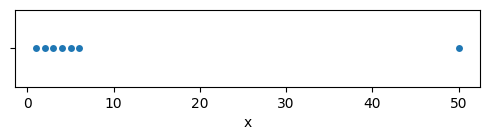

In [101]:
import matplotlib.pylab as plt
import seaborn as sns

with plt.rc_context({"figure.figsize":(6,1)}):
     sns.stripplot(x=xs, jitter=0);

#### Tukey outliers


In [102]:
Q1, Q3 = xs.quantile([0.25, 0.75])
IQR = Q3 - Q1
xlim_low = Q1 - 1.5*IQR
xlim_high = Q3 + 1.5*IQR
(xlim_low, xlim_high)

(-2.0, 10.0)

Applying the heuristics based on the quartiles of the data sample,
we obtain the criteria that any values outside the interval $[-2,10]$
are to be counted as outliers.
In words,
values smaller than $-2$ or greater than $10$
are to be considered as "unusual" for this data sample $\mathbf{x}$.

Let's build a mask that identifies all values that fit these criteria.

In [103]:
tukey_outliers = (xs < -2.0) | (xs > 10.0)
tukey_outliers

0    False
1    False
2    False
3    False
4    False
5    False
6     True
Name: x, dtype: bool

The `tukey_outliers` series has the same index as the data frame `df6`,
and tells us which rows in the data frame contain outliers.

#### Computing z-scores

Given the list of values $\mathbf{x} = [x_1, x_2, \ldots, x_n]$,
we compute the $z$-scores of each value
$\mathbf{z} = [z_1, z_2, \ldots, z_n]$,
where each $z_i = \frac{x_i - \overline{\mathbf{x}}}{s_{\mathbf{x}}}$.


The $z$-scores of an observation tells you where this observation fits
within the data.


In [104]:
xbar = xs.mean()
xstd = xs.std()
zscores = (xs - xbar) / xstd
zscores

0   -0.517770
1   -0.461139
2   -0.404508
3   -0.347877
4   -0.291246
5   -0.234615
6    2.257155
Name: x, dtype: float64

We can identify outliers by their unusually large $z$-scores.
For example,
we could check which values are more than two standard deviations away from the mean,
by selecting $z$-scores that are less than $-2$ or greater than $2$.

In [105]:
zscore_outliers = (zscores < -2) | (zscores > 2)
zscore_outliers

0    False
1    False
2    False
3    False
4    False
5    False
6     True
Name: x, dtype: bool

Let's combine all these "verdicts" about the outlierness of the `xs`
and store them as the columns in the data frame `results`.

<!-- Note the outlier definition consists of two conditions
combined with bitwise OR operator `|` (the "pipe" character on the English keyboard).-->

In [106]:
results = pd.DataFrame({"x":xs,
                        "tukey_outlier": tukey_outliers,
                        "zscore": zscores,
                        "zscore_outlier": zscore_outliers})
results

,x,tukey_outlier,zscore,zscore_outlier
0,1,False,-0.517770,False
1,2,False,-0.461139,False
2,3,False,-0.404508,False
3,4,False,-0.347877,False
4,5,False,-0.291246,False
5,6,False,-0.234615,False
6,50,True,2.257155,True


We see that both the Tukey method and the $z$-score method
have correctly identified $50$ as an outlier.

### Removing outliers

We can use the `tukey_outliers` or `zscore_outliers` verdicts
to select only the subset of values that are not outliers.
For example,
we can invert the `tukey_outliers` mask
using the Python NOT operator `~`
to obtain a mask for all the values which are *not* outliers.

<!-- The "not outliers" are the values we want to keep. The Python operator `~` is used for this. -->

In [107]:
~tukey_outliers

0     True
1     True
2     True
3     True
4     True
5     True
6    False
Name: x, dtype: bool

Using the `~outliers` mask allows us to select all the non-outliers.

In [108]:
xs[~tukey_outliers]

0    1
1    2
2    3
3    4
4    5
5    6
Name: x, dtype: int64

We can assign this to a new variable and continue the statistical analysis
based on the subset of `xs` that excludes the problematic outlier.

#### When should we drop outliers

Rejecting observations that are far outside the range of expected values
is the correct thing to do when these observations arise from data entry errors,
but that doesn't mean we should always remove outliers to make our data look "nicer."
We need to have a legitimate reason for removing outliers.

Outliers may indicate an unexpected phenomenon,
or a previously unsuspected variable that influences the measurement.
It would be a shame to just discard a potentially valuable finding.
Instead of rejecting these observations,
you could instead investigate the unusual cases more closely and look for an explanation.
A consultation with a subject-matter expert (SME)
would be a good idea before making the decision to exclude certain observations.

Alternatively,
you could use a statistical procedure that gives less weight to outliers,
or you could repeat the experiment to obtain a new dataset and compare your two sets of results.
Finally,
you could choose to report results both with and without outliers and let your audience decide.

<!-- TODO: mention robust statistics + FWD reference? -->

If you eliminate data points from your analyses (for any reason),
make sure to report this when reporting your results.

<!--
Whatever strategy you prefer,
it's best to decide how you will deal with outliers *a priori*---before you collect your data.

The goal of certain statistics procedures like *anomaly detection* is precisely to identify outliers,
so you should definitely not remove them.

Outlier in n-dimensions: e.g. an univariate outlier might not be a bi- or multivariate outlier.
-->

### Summary of data cleaning

The data "cleaning" steps we introduced in this section
are an essential prerequisite for any statistical analysis.
It's important that you learn to perform these basic data manipulations
so that you'll be able to work with messy, real-world datasets.
We've only scratched the surface of what is possible,
but I hope you got a general idea of the data cleaning steps you might need to do.

Data pre-processing is not something you can "outsource" or handoff to a colleague,
because it's very informative to "touch" the data to get to know it.
If you only see data after it has been cleaned up by someone else,
then you're missing a lot of the context,
and you were not included in some important decisions,
like dealing with missing values and outliers.


The **Case Studies** section later in this tutorial
shows some hands-on examples of data cleaning.
To give you a taste of the data cleaning tasks,
here are some exercises that ask you to clean-up
the raw data files in `datasets/raw/`
to obtain the same data as in `datasets/` folder.

### Exercise A

TODO

## Data sources

### Data extraction: get our hands on data

Real-world data is stored in all kinds of places,
and you often need to do an "extraction" phase to get your hands on the data.
You'll have to deal with many different kinds of data sources at one point or another in your data career.
Here are the most common data sources you should know about:

<!-- Robyn said: Consider cutting this list of data sources -->

-   **Local files.**
    The simplest kind of data file is the one you can "Save as,"
    receive as an email attachment,
    and open from your local file system.
    Every file is described by a *file path* that specifies the location of the file in the local file system,
    and a file *extension* like `.csv`, `.xlsx`, `.json`, `.xml`,
    which tells you what kind of format the data is stored in.
    More on data file formats below.

-   **Online files.**
    Files can be made available for download on the internet by placing them on a web server.
    Web servers also work with paths.
    The job of a web server is to respond to requests for different paths.
    For example,
    when your web browser makes a GET request for the path `/datasets/minimal.csv`
    on the server `noBSstats.com`,
    the web server software running on `noBSstats.com`
    will respond by sending back the contents of the file.
    The act of GETing a file from a remote host and saving it to the local file system is
    usually accomplished using the "Save as" operation,
    a terminal command line `wget https://noBSstats.com/datasets/minimal.csv`,
    of a Python script `import requests; response = requests.get("..."); ...`.
    <!-- TODO: finish this example ot make it a reference to some code block -->

-   **Logs.**
    Many software systems generate log files as part of their normal operation.
    For example,
    every web server keeps a log of all the requests it has received,
    which can be a very useful data source.
    <!-- Vanessa's dataset of website visitors was obtained by processing the logs of her web server. TODO: remind reader + pageref -->

-   **Surveys.**
    Send out a survey of some sort and obtain the responses.
    Every startup should be investing time to talk to their customers,
    and user surveys play a big role in this.

-   **Databases.**
    Company operational data is stored in one or more databases.
    Access to this data is essential for understanding any business.
    The Structured Query Language (SQL) is the standard interface for accessing data in databases.
    Steps:
    (1) obtain access to the DB (server, username, and password),
    (2) connect to the DB,
    (3) run a DB query SELECT \... FROM \...,
    (4) save the output to a CSV file.

-   **Websites.**
    Data can sometimes be found as tables in a webpage's HTML markup code.
    This data is usually displayed with the intention of being read by humans,
    but it's often useful to extract the tabular data.
    <!-- TODO: plug read_html -->

-   **APIs.**
    An *application programming interface* (API) is a standard way for computers to exchange data.
    Data obtained from APIs is intended for machine use.
    You can think of APIs as websites that allow fine-grained control of the data you're requesting,
    and a well-defined format for the response data.
    <!-- Common data formats used for API responses are JSON and XML. -->
    <!-- TODO mention Getting data from APIs can be done via requests + json processing (examples using github API?) -->

-   **Data repositories.**
    Existing datasets on specialized web servers for hosting data.
    A data repository will allow you to download datasets in the usual formats CSV, spreadsheet, etc.
    but also has additional description of the data (metadata).
    Examples of data repositories include,
    government data repositories,
    open science repositories like OSF, Zenodo, etc.
    <!-- TODO: finish this with better examples -->

-   **Published plots and graphs.**
    Using tools like [`graphreader.com`](https://www.graphreader.com/),
    you can sometimes read data points from graphs in published research papers.

-   **Research datasets.** 
    Ask researchers to provide you with raw data files from any research paper.
    You can expect mixed responses,
    but it doesn't hurt to ask.

-   **SQL files.** 
    Structured Query Language is the standard format used to represent data in databases.
    A *database dump* files contain the complete instructions for recreating a database and all the contents in it.
    TODO: mention not meant to work directly -- but load into DB then query to extract CSV.


### Data formats
<!-- ALT. Data file formats -->

Data files can be encoded in one of several data formats:
CSV files, TSV files, spreadsheets, JSON files, HTML files, SQLite database files, etc.
We'll now show examples of the Pandas code for loading data from various file formats,
which are the most common data formats seen "in the wild."

<!-- Robyn said: Move formats to appendix? Consider condensing into a table instead with columns: - snippet of what the data looks like, - name of the format - method to read it in python -->


<!-- CUT SINCE NOT COVERING ALL FORMATS ANYMORE
all of the above source formats.
You can find all the source data files in the `datasets/formats/` directory.
We'll use the function `head` to print the first few lines of the data files so you'll get a feeling for how the data is structured,
then show the appropriate Pandas function for loading data in this format.
The actual data we'll be loading in will be the same in each case,
it's just encoded in a different source format,
but after loading the data into Pandas,
all the different formats will end up as identical data frame objects. -->

**Content warning:** In the next few pages, acronyms like SQL, TSV, and JSON will be thrown at you.
I know you're thinking "wow that escalated quickly,"
but we have to get a bit technical to make the knowledge actually useful.

<!-- If we're going to talk about data, then let's make it real.
Let's go get the data wherever it may be:
in Excel files, in text files, in databases, in scientific experiment logbooks, everywhere! -->

### CSV files

The initialism CSV stands for Comma-Separated-Values and is a widespread file format for tabular data.
CSV files consist of plain text values separated by commas.
The first line of a CSV file usually contains the variable names (it is called the header row).
Comma-Separated-Values files are the most common file format for tabular data that you are likely to encounter.
You can load CSV data using the function `pd.read_csv(<path>)`,
where `<path>` is the location of the CSV file.

Let's see the "raw contents" of the data file `datasets/minimal.csv`
as you would see if you opened it with a basic text editor like (e.g. Notepad in Windows or TextEdit on a Mac).

```
    x,y,team,level
    1.0,2.0,a,3
    1.5,1.0,a,2
    2.0,1.5,a,1
    2.5,2.0,b,3
    3.0,1.5,b,3
```

Note the first line of this file is a "header row" that contains the column names,
while the remaining rows contain the actual data for the observations.


<!-- Comma-Separated-Values are the most common format for tabular data.
CSV files are regular text files that contain individual values (numeric or text) separated by commas. In many CSV files, the first line is a special header row that contains the names of the variables. -->

Here is the code for loading a CSV file `datasets/minimal.csv`
and showing the resulting data frame.

In [109]:
df = pd.read_csv("datasets/minimal.csv")
print(df)

     x    y team  level
0  1.0  2.0    a      3
1  1.5  1.0    a      2
2  2.0  1.5    a      1
3  2.5  2.0    b      3
4  3.0  1.5    b      3


### Other data formats

#### Spreadsheets files

Spreadsheet software like LibreOffice Calc, Microsoft Excel, and Google Sheets
can be used to edit spreadsheet files with extensions like `.ods`, `.xlsx`, and `.xls`.
We can load data from spreadsheet files using the function `pd.read_excel()`.

In [110]:
%pip install -q odfpy

Note: you may need to restart the kernel to use updated packages.


In [111]:
odsdf = pd.read_excel("datasets/formats/minimal.ods",
                      sheet_name="Sheet1")
odsdf.equals(df)

True

In [112]:
%pip install -q openpyxl

Note: you may need to restart the kernel to use updated packages.


In [113]:
xlsxdf = pd.read_excel("datasets/formats/minimal.xlsx",
                       sheet_name="Sheet1")
xlsxdf.equals(df)

True

#### TSV

The Tab-Separated-Values format is similar to CSV, but uses TAB characters as separators.
TAB is a special character used for aligning text into columns,
an it is represented as `\t` in Python strings.
Here is the contents of the data file `datasets/formats/minimal.tsv`.

```TSV
x       y       team    level
1.0     2.0     a       3
1.5     1.0     a       2
2.0     1.5     a       1
2.5     2.0     b       3
3.0     1.5     b       3
```

<!-- TODO: say TAB keypress means move-one-colum-to-the-right inside tables (like spreadsheet software) -->

We load TSV files using the function `pd.read_csv`
by passing the value `"\t"` to the `sep` (separator) argument:
`pd.read_csv(<path>, sep="\t")`.

In [114]:
tsvdf = pd.read_csv("datasets/formats/minimal.tsv", sep="\t")
tsvdf

,x,y,team,level
0,1.0,2.0,a,3
1,1.5,1.0,a,2
2,2.0,1.5,a,1
3,2.5,2.0,b,3
4,3.0,1.5,b,3


In [115]:
tsvdf.equals(df)

True

#### JSON

The acronym JSON stands for JavaScript Object Notation,
and it is one of the most common data format by web applications and APIs.
The JSON data format is similar to Python's notation for `list`s (square brackets `[...]`),
and `dict`s (curly braces `{...}` containing key:value pairs).
Here are the contents of the data file `datasets/formats/minimal.json`.

```JSON
[
  {"x":1.0, "y":2.0, "team":"a", "level":3},
  {"x":1.5, "y":1.0, "team":"a", "level":2},
  {"x":2.0, "y":1.5, "team":"a", "level":1},
  {"x":2.5, "y":2.0, "team":"b", "level":3},
  {"x":3.0, "y":1.5, "team":"b", "level":3}
]
```

Pandas provides the function `pd.read_json()` for loading JSON data.
If the contents of the JSON file is a list of observation,
we can load JSON files directly into a data frame using the function `pd.read_json()`.

In [116]:
jsondf = pd.read_json("datasets/formats/minimal.json")
jsondf.equals(df)

True

<!-- TODO: plug `pd.json_normalize` https://pandas.pydata.org/docs/reference/api/pandas.json_normalize.html via https://towardsdatascience.com/all-pandas-json-normalize-you-should-know-for-flattening-json-13eae1dfb7dd -->

If the JSON source data file has a structure that is more complicated than a list-of-observations,
we can try calling the function `pd.json_normalize`,
which will try to auto-guess the structure of the JSON data.
In the general case,
importing JSON data might require using the Python module `json` to load the data into Python data structures
and carry out processing steps to extract the desired subset of the data you're interested in and organizing it
into the list-of-observation format that Pandas expects.

#### HTML tables

The HyperText Markup Language format is used by all the web pages you access on the web.
The HTML source code of a webpage can include tabular data (the `<table>` tag in the HTML source code).
Here are the first few lines of the HTML file `datasets/formats/minimal.html`.

```html
<table>
  <thead>
    <tr>
      <th>x</th>
      <th>y</th>
      <th>team</th>
      <th>level</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1.0</td>
      <td>2.0</td>
      <td>a</td>
      <td>3</td>
    </tr>
```

We can load the data from HTML files using the function `pd.read_html()`,
which returns a list of data frames extracted from the tables found in a HTML document.

In [117]:
%pip install -q lxml

Note: you may need to restart the kernel to use updated packages.


In [118]:
tables = pd.read_html("datasets/formats/minimal.html")
htmldf = tables[0]
htmldf.equals(df)

True

In [119]:
htmldf

,x,y,team,level
0,1.0,2.0,a,3
1,1.5,1.0,a,2
2,2.0,1.5,a,1
3,2.5,2.0,b,3
4,3.0,1.5,b,3


#### XML

The eXtensible Markup Language format is used by many structured data formats and APIs.
Here are the first few lines of the XML data file `datasets/formats/minimal.xml`.

```xml
<?xml version='1.0' encoding='utf-8'?>
<players>
  <player>
    <x>1.0</x>
    <y>2.0</y>
    <team>a</team>
    <level>3</level>
  </player>
```

We use the function `pd.read_xml()` to load XML data.

In [120]:
xmldf = pd.read_xml("datasets/formats/minimal.xml")
xmldf.equals(df)

True

The Python libraries `lxml` or `BeautifulSoup` can be used
for more advanced XML parsing and data processing steps (out of scope).

#### SQLite databases

SQLite is a commonly used data format for storing a complete database as a single file.
Pandas provides the generic functions `pd.read_sql_table()` and `pd.read_sql_query()` for extracting data from databases,
and we can use these functions to "connect" to the SQLite database file
and read the data stored in one or more database tables in the SQLite database file.

In [121]:
%pip install -q sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [122]:
from sqlalchemy import create_engine
dbpath = "datasets/formats/minimal.sqlite"
engine = create_engine("sqlite:///" + dbpath)
with engine.connect() as conn:
    sqldf = pd.read_sql_table("players", con=conn)
    print(sqldf.equals(df))

True


In [123]:
query = "SELECT x, y, team, level FROM players;"
sqldf2 = pd.read_sql_query(query, con=engine)
sqldf2.equals(df)

True

The key to remember when dealing with various source files,
is that you your goal is to get the data in whatever "shape" it is in,
and save it as a Pandas data frame.
Do not try to restructure or modify the data in its source format,
you can do the data transformation and cleaning steps once you have it in the Pandas data frame,
like we saw in the **Data Cleaning** section.

## Case studies

We'll now describe how datasets used in the book were obtained:
Vanessa's website visitors,
Bob's electricity prices,
and Charlotte's student scores,
as well as the apples, kombucha, doctors, etc.
We were not involved in the data collection process for these datasets,
but it's still worth asking the clients (Vanessa, Bob, Charlotte, etc.)
about the steps they followed to obtain the data.
There is an unspoken rule in statistics
that **the more you know about the data,
the better you'll be able to do the statistical analysis on it**.

The goal is to just show some examples of real-world data collection and cleanup steps,
so you'll know what to expect when working on your own datasets.
We'll present the backstory for each dataset as an informal conversation.

<!-- OLD = Background stories for the example datasets -->



### Collecting the apples dataset

Alice's orchard

TODO: import from .tex

### Collecting the electricity prices dataset

A few days later,
you call up Bob to ask him about how he collected the electricity prices dataset `eprices.csv`.
He tells you he obtained the electricity pricing data by scraping the pages from a local price-comparison website.
This website contained the electricity prices for various charging stations in the form of an HTML table.
He used the function `pd.read_html()` to extract the prices for each station
and categorized the stations based on their location in the East and West parts of the city.

<!-- TODO: in notebook, JOIN data from individual stations + prices -->

Listening to the explanations,
you wonder about the possible bias that might exist in the electricity prices that Bob collected,
so you decide to ask him about it.

"Bob, tell me more about this website. Which charging stations are listed there?" you ask.

"It's a volunteer-run effort. People post the price they paid every day,
so it includes a wide selection of the stations.
There were several pages of results,
and each page has 20 prices,
so I think I had the data from most of the stations" he says.

"Ah OK, cool. It seems it's a pretty good sample," you say.
"I was worried it might be a commercial website that only shows the prices from 'preferred' stations."
<!-- Robyn said: Potential issues with the data Repeated measure on the same stations: without accounting for it, people voluntarily posting the price they paid, not selected at random TODO: fix this -->

You're reassured you have a representative sample of the prices,
so you'll be able to study the question
"Which part of the city has cheaper electricity prices?"
since you have the data from a reasonable number of charging stations.

You load up Bob's dataset `datasets/epriceswide.csv`
and print the first few rows to see how the dataset is structured.

In [124]:
epriceswide = pd.read_csv("datasets/epriceswide.csv")
epriceswide.head()

,East,West
0,7.7,11.8
1,5.9,10.0
2,7.0,11.0
3,4.8,8.6
4,6.3,8.3


It seems Bob stored the data in "wide format,"
with the prices from charging stations in the East in one column,
and the prices from the charging stations in the West in another column.
In other words,
knowing if a given price is in the East or West is encoded in its column position.
You're can use the `.melt()` method to convert wide data into long data.

In [125]:
eprices = pd.read_csv("datasets/eprices.csv")
eprices.head()

,loc,price
0,East,7.7
1,East,5.9
2,East,7.0
3,East,4.8
4,East,6.3


You're confident you know what you'll need to do from here.

"Okay Bob. Thanks for the info." you say to him.
"I think I have everything I need to do the statistical analysis,
and I'll get back to you soon with the results."

<!-- 

"Cool!
Thanks for agreeing to provide 'stats support' on this.
I'm looking forward to seeing the results."


Do you know what type of statistical analysis you'll use for this data set?"
he asks.

Bob is asking a really good question.
Depending on the data we have,
there are several types of statistical analysis recipes we can use.
In this case,
we're trying to compare the means of two groups of numerical variables.
In order to describe the variability in the data,
we'll also measure the standard deviation for the two groups.
Based on these statistics computed from the observed data,
we'll be able to make conclusions about the general population (all electricity prices).
Our final goal is to tell Bob conclusively if there is a difference between East and West prices,
and if there is a difference which side of his city has the cheaper prices.

You recently did an analysis of a similar dataset
where you compared the means of two groups,
so you have a clear plan for what you're going to do.

"My plan is to compute the mean and the standard deviation for the East and West prices,
then compare the means to see if there is a difference.
If there is a difference between the means,
I'll run a statistical test to see if the observed difference is statistically significant,"
you explain.

"Wow, sounds complicated!" exclaims Bob,
mystified by the technical jargon.

You reassure him there is nothing too complicated and statistical testing is just a fancy way
to compare means obtained from two groups
and determine if the observed difference in the means could have occurred by chance.
You clearly see he's interested to learn more about how statistical tests work,
but you know this is not the moment to explain everything.
There is a whole book ahead of us for this.

-->


<!-- 
In Chapter 2 we'll learn to use probability theory to model data distributions,
then in Chapter 3 develop tools for estimating parameters from data samples
and using statistical hypothesis testing procedures.
Let's not rush into things.
Easy does it. -->

<!-- TODO: future conversational --- Bob asks why we used the normality assumption, response \"funny you asked this, I also ran the nonparametric Signed Rank test\...\" -->


### Collecting the students dataset

Charlotte is a bit of a techie,
so she set up a learning management system (LMS) server for the students in her class.
Charlotte learned how to do this (run web applications on her own server) after suffering months of difficulties
of trying to upload her teaching materials to the platform provided by her school.
She reasoned that it can't be this hard to run her own server:
it's just documents, video lectures, and exercises,
and there is plenty of software that can do this.

Charlotte's main reason for running her own server is because
she didn't feel comfortable with the idea of her students' learning process being monitored by a proprietary learning platform.
You're excited to talk to her,
because it's nice to meet a teacher who cares deeply about student data privacy.

The LMS Charlotte used for this class stores student records in a database.
She made some Structured Query Language (SQL) queries using the function `pd.read_sql_query()`
to obtain detailed logs of each students' actions on the platform.
She then aggregated the total `effort` (total time spend on the platform)
and the combined `score` for each student.
She transported the data as a CSV to her laptop,
then send it to you.

Using the function `pd.read_csv`,
you can load the `students.csv` dataset and print the first few rows.

In [126]:
students = pd.read_csv("datasets/students.csv", index_col="student_ID")
students.head()

,background,curriculum,effort,score
student_ID,,,,
1,arts,debate,10.96,75.0
2,science,lecture,8.69,75.0
3,arts,debate,8.60,67.0
4,arts,lecture,7.92,70.3
5,science,debate,9.90,76.1


```
SELECT <which variables> FROM <which table>;
SELECT <which variables> FROM <which table> WHERE <conditions>;

e.g. 
SELECT student_id, time_on_task FROM learner_analytics;
SELECT student_id, scrore FROM student_final_grades;

AGGREGATE total effort
JOIN effort and score tables
```

You go through the column names to confirm that you understand the meaning of the categorical variables
(see page )
and you know how all the numerical variables were calculated.

You wonder how she calculated the `effort` and `score` variables.
She explains she computed the `effort` variable from the total time spent learning,
which includes watching videos and doing exercises.
She computed the `score` variable as the average success rate on all exercises that the student completed.

"Okay, thanks Charlotte," you say, "the dataset looks great!"


<!-- 
Let me just confirm the two questions you're interested in."

"Right. So the first question is whether the curriculum choice (`lecture` vs.`debate`) makes a difference in students `score`s.
And the second question is if students who made more effort in the course got a higher score."

The first question is similar to the electricity prices comparison (comparison between the means in two groups),
so you know exactly how to proceed for this one.
The second question is about a relation between two numerical variables,
which you can study by using linear regression to model how `score` variable increases (or decreases)
for different values of the `effort` variable.

"Thanks for going over all this with me," you say.
"I know exactly how to proceed from here."

"You're welcome, and looking forward to discussing the results with you when they are ready,"
says Charlotte as you say goodbye.

-->

<!-- Charlotte obtained the educational.csv data directly from her school's learning management system (LMS) database (DB). Each student has associated activity logs (time spent learning and solving problems) and a score (final grade) for each course they are enrolled in. Charlotte used WHERE clauses in a structured query language (SQL) query to obtain only the data for the activity logs and final-grade data for the students in her class. -->


### Collecting the kombucha dataset

Khalid measures random samples from different batches ...

### Collecting the doctors dataset

Dan's survey of doctors lifestyle choices ...


### Collecting the website visitors dataset

Recall the website visitors dataset.
You can see the first few rows of the dataset by loading the CSV file `datasets/visitors.csv`.

In [127]:
visitors = pd.read_csv("datasets/visitors.csv")
visitors.head()

,IP address,version,bought
0,135.185.92.4,A,0
1,14.75.235.1,A,1
2,50.132.244.139,B,0
3,144.181.130.234,A,0
4,90.92.5.100,B,0


Looking at the dataset helps you understand the general structure,
but you have some questions about how the data was collected,
so you decide to call Vanessa and ask her.

"Hi Vanessa. I'm looking at the data you sent me and I had some questions," you start.

"Yes, ask away," she responds.

"How did you assign the visitors to version A or B of the website?" you ask.

"Every time the website received a new visitor (new IP address),
it randomly sent them to either version A or version B," she says.
"It's basically equivalent to flipping a coin."
She goes on to explain that the two versions of the website can be identified from the server logs,
since the two designs use different background images.
A visitor who sees version A of the website will load the background image `images/bgA.jpg`,
while visitors who see version B will load the image `images/bgB.jpg`.

"And how did you calculate the `bought` column?" you ask.

"When a visitor completes the purchase steps,
they are sent to a special `/thankyou` page,
so I used that to identify visitors who bought something."

"Can you tell me more about the steps you took to extract the data from the server logs?"

"Sure," replies Vanessa and starts on a long explanation, which is summarized below.

Vanessa started by extracting the web server access logs for the date range when the experiment was running.
She then loaded the log files into Pandas data frames and concatenated the data from the different days.
<!-- TODO: mention pd commands used for merge -->
She then did some data cleaning by excluding rows generated from bots based on the user agent value.

She then applied the main logic for determining the `bought` variable
by collecting all the log entries for individual IP addresses.
For each visitor (unique IP address) she looked for a request to `images/bgA.jpg`
or `images/bgB.jpg` followed by the request to the `/thankyou` page,
which indicates they bought something (`bought=1`).
If the visitor never reached the `/thankyou` page,
then we know they didn't make a purchase,
so she recorded `bought=0` for them.

Finally she stored the data as `visitors.csv` and sent it to you.

Remore shell  
`zcat /var/log/nginx/access.log.*.gz > /tmp/access_logs.txt`


Local shell  
`scp minireference.com:/tmp/access_logs.txt data/access_logs.txt`

Links

- https://riptutorial.com/pandas/example/15180/read-nginx-access-log--multiple-quotechars-
- [ParseNginxAccessLogs.ipynb](./explorations/ParseNginxAccessLogs.ipynb)

In [128]:
# access_logs = open("data/access_logs.txt")
# df = pd.read_csv(
#     access_logs,
#     sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
#     engine='python',
#     usecols=[0, 3, 4, 5, 6, 7, 8],
#     names=['ip', 'time', 'request', 'status', 'size', 'referer', 'user_agent'],
#     na_values='-',
#     header=None
# )

- A VIEWS = CONTAINS /static/images/homepage/bgA.jpg
- B VIEWS = CONTAINS /static/images/homepage/bgB.jpg
- A CONVERSIONS = CONTAINS /static/images/homepage/bgA.jpg and /thankyou
- B CONVERSIONS = CONTAINS /static/images/homepage/bgB.jpg and /thankyou
- p_A = A CONVERSIONS / A VIEWS
- p_B = B CONVERSIONS / B VIEWS


We can compute the conversion rate for each version of the website
using the `.groupby()` method.

In [129]:
visitors.groupby("version") \
         ["bought"].value_counts(normalize=True)

version  bought
A        0         0.935175
         1         0.064825
B        0         0.962229
         1         0.037771
Name: proportion, dtype: float64

In [130]:
visitors.groupby("version") \
         ["bought"].agg(["sum", "count"]) \
         .eval("sum/count")

version
A    0.064825
B    0.037771
dtype: float64

For version A (the new design), the conversion rate is $p_{\!A} = 0.0648$.
For version B (the old design), the conversion rate is $p_{B} = 0.0377$.

<!-- TODO: add conclusion + take home message -->
<!-- TODO: add conversational Vanessa interested in stats --- explain this is an instance of compare two proportions analysis recipe -->


###  Collecting the players dataset

TODO

## Bonus topics

### Index and sorting

index operations (set, change, reset, etc.)
`sort`, `sort_values`, `sort_index`, and using `rank()` method


### Pandas plot methods

Use the `.plot()` method to obtain basic plots,
see Appendix E for Seaborn tutorial for more advanced plots (specific for statistics).


### NumPy arrays

Under the hood, Pandas `Series` and `DataFrame` objects are based on efficient numerical NumPy arrays.
You generally won't need to interact with NumPy commands when working in Pandas,
but sometimes it can be useful to know the NumPy syntax to perform certain data selection tasks.

Let's look at some simple examples
of the data `[1,3,5,7]` stored as a NumPy array.

In [131]:
import numpy as np
values = np.array([1, 3, 5, 7])
values

array([1, 3, 5, 7])

In [132]:
values - 2

array([-1,  1,  3,  5])

In [133]:
np.exp(values)

array([   2.71828183,   20.08553692,  148.4131591 , 1096.63315843])

### Selecting a subset of the values

Selection of subsets is similar to what we do in Pandas:
we use a mask to select the desired values.

In [134]:
values < 4  # selection mask

array([ True,  True, False, False])

In [135]:
values[values < 4]

array([1, 3])

#### Create a list of evenly spaced numbers

We'll use this often when plotting functions.

In [136]:
np.linspace(0, 1, 20)

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

## Conclusion

The Stack Overflow discussion forums are a good place to ask questions
once you learn the jargon terms for data transformations (`.melt()`, `.groupby()`, `.agg()`, etc.).

<!-- TODO: better conclusion -->

## Exercises

- Data transformations: `melt`, `dropna`, filter by value, etc.

- Rename categorical values to normalize them. `OH` (Ohio), `WA` (Washington), etc.

- Use `groupby` to compute the average $y$-position for the players in the two teams.  
  
- `str` methods: split City, ST -- into city and state (or Last Name, First name into separate names)

- Filter out outliers using pre-specified cutoff (Q3 + 1.5IQR) but don't tell how limits were computed (FWD refs to Descr. Stats and Z-score).


## Links

I've collected the best learning resources for Pandas for you.


### Music videos

- https://www.youtube.com/watch?v=4NJlUribp3c



### General concepts

- https://en.wikipedia.org/wiki/Data_wrangling

- https://en.wikipedia.org/wiki/Data_preparation




### Cheatsheets

- https://homepage.univie.ac.at/michael.blaschek/media/Cheatsheet_pandas.pdf

- Data Wrangling with pandas Cheat Sheet
  https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
  
- Pandas Basics from the Python For Data Science Cheat Sheet collection   
  https://datacamp-community-prod.s3.amazonaws.com/dbed353d-2757-4617-8206-8767ab379ab3  
  see also https://www.datacamp.com/blog/pandas-cheat-sheet-for-data-science-in-python

- The `pandas` DataFrame Object  
  https://www.webpages.uidaho.edu/~stevel/cheatsheets/Pandas%20DataFrame%20Notes_12pages.pdf





### Tutorials

- Getting started with pandas tutorial  
  https://www.efavdb.com/pandas-tips-and-tricks

- Making head and tails of Pandas  
  https://www.youtube.com/watch?v=otCriSKVV_8
  https://github.com/tomaugspurger/pydataseattle

- Essential basic functionality (very good)  
  https://pandas.pydata.org/docs/user_guide/basics.html

- The 10 minutes to Pandas tutorial  
  https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html 

- Effective Pandas tutorial by Matt Harrison
  (Use appropriate data types to save memory. Lots of examples of method chaining.)  
  https://www.youtube.com/watch?v=zgbUk90aQ6A&t=526s


- https://devopedia.org/pandas-dataframe-operations

- Nice examople dataframe with variety of data types + compact reference of all operations  
  https://dataframes.juliadata.org/stable/man/comparisons/#Comparison-with-the-Python-package-pandas  
  see also https://github.com/bkamins/Julia-DataFrames-Tutorial/

- Pandas: Python Data Analysis Library  
  https://johnfoster.pge.utexas.edu/numerical-methods-book/ScientificPython_Pandas.html  
  See also [notebook](https://github.com/johnfoster-pge-utexas/numerical-methods-book/blob/master/content/ScientificPython_Pandas.ipynb)
  and [src](https://github.com/johnfoster-pge-utexas/numerical-methods-book/tree/master/content).

- Pandas sections from *Python Data Science Handbook*
  https://www.one-tab.com/page/OaSZriUtRg6wb7mppbamag  
  via https://jakevdp.github.io/PythonDataScienceHandbook/

- Pandas tutorials -- lots of details  
  https://www.one-tab.com/page/Iw-cytCuTe-FiNZ7F1nrww

- pandas Foundations notebooks from DataCamp  
  https://trenton3983.github.io/files/projects/2019-01-24_pandas_dataframes/2019-01-24_pandas_dataframes.html  
  https://trenton3983.github.io/files/projects/2019-02-04_manipulating_dataframes_with_pandas/2019-02-04_manipulating_dataframes_with_pandas.html

- Lots of simple tasks
  https://nbviewer.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb





### Data cleaning

- Tidying Data tutorial by Daniel Chen (Lots of examples of melt operations on real-world datasets)  
  https://www.youtube.com/watch?v=iYie42M1ZyU
  https://github.com/chendaniely/pydatadc_2018-tidy/blob/master/notebooks/tidy.ipynb

- Data Cleaning lab from Applied & Computational Mathematics Emphasis (ACME) course  
  https://acme.byu.edu/0000017c-ccff-da17-a5fd-cdff03570000/acmefiles-09-datacleaning-2021-pdf  
  See more [materials here](https://acme.byu.edu/2021-2022-materials).

- https://github.com/hxchua/datadoubleconfirm/blob/master/EuroPython/DataCleaning.ipynb

- Nice visualizations for Pandas operations (click on examples)
  https://pandastutor.com/vis.html

- A talk on data cleaning principles by Karl Broman
  https://www.youtube.com/watch?v=7Ma8WIDinDc  
  slides https://kbroman.org/Talk_DataCleaning/data_cleaning.pdf

- https://datascienceinpractice.github.io/tutorials/06-DataWrangling.html

- https://datascienceinpractice.github.io/tutorials/07-DataCleaning.html

- https://www.mariakhalusova.com/posts/2019-01-31-cleaning-data-with-pandas/


<!--
COMMAND LINE CLEANUP
http://mchap.io/using-foia-data-and-unix-to-halve-major-source-of-parking-tickets.html
via https://news.ycombinator.com/item?id=17754105
-->




### Articles

- *pandas: a Foundational Python Library for Data Analysis and Statistics* by Wes McKinney  
  https://www.dlr.de/sc/Portaldata/15/Resources/dokumente/pyhpc2011/submissions/pyhpc2011_submission_9.pdf

- More Pandas articles and links  
  https://www.one-tab.com/page/-EZFbibXRq2xZRYM9iUVDg

- Good tips about `loc` vs. `[]`  
  https://stackoverflow.com/a/48411543/127114

- Devoperia articles on Pandas:  
  [data frame operations](https://devopedia.org/pandas-dataframe-operations)  
  [data structures](https://devopedia.org/pandas-data-structures)  
  [data preparation](https://devopedia.org/data-preparation)





### Books

- https://store.metasnake.com/effective-pandas-book







<!--

TODO import links from gdoc

### R learning resources

- https://www.one-tab.com/page/4P1d6YLhQKm1FthXB4qRzg
- https://remkoduursma.github.io/learningguidetor/dataskills1.html
- https://remkoduursma.github.io/learningguidetor/dataskills2.html		

#### Tidy data in R
- https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html
- https://datasciencebook.ca/wrangling.html
- https://moderndive.com/3-wrangling.html 
- https://github.com/jennybc/lotr-tidy/


-->


